# Credit Card Data Overview

In [136]:
# Where the data comes from
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [137]:
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
import pandas as pd # used for data manipulation and modification
import numpy as np
from matplotlib import pyplot as plt # plotting library
import seaborn as sns # data visualization library
import plotly.express as px # for interactive plots
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.model_selection import train_test_split# for splitting the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate

# Makes sure the graphs show in this window, not a new one
%matplotlib inline 

In [139]:
# Make sure to place creditcard.csv in the Data folder
df = pd.read_csv(r"../Data/creditcard.csv",engine='python')

In [140]:
# Data Overview
    # Features V1, V2, … V28 are the principal components obtained with PCA, the only features 
    # which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds 
    # elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is 
    # the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
    # Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [141]:
# Info about our data and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [142]:
# How much data are we working with
print("Row Count:", df.shape[0]) # Number or rows
print("Col Count:", df.shape[1]) # Num Cols

Row Count: 284807
Col Count: 31


In [143]:
df.head(5) # first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [144]:
df.sample(5) # sample 5 random rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162938,115504.0,1.881811,-0.190656,-0.563902,1.033377,0.088967,0.526887,-0.422438,0.178785,0.503776,...,-0.166614,-0.466754,0.325142,0.159721,-0.338579,-1.006857,0.045648,-0.026132,38.95,0
247903,153730.0,-1.666320,0.248398,2.405493,1.099259,-0.809653,1.447166,-0.956758,1.125315,0.585865,...,0.257588,0.842610,-0.313884,0.714051,0.480107,-0.261772,0.163710,0.072256,65.70,0
225546,144291.0,-1.583370,0.503246,-1.523976,0.033004,-1.209251,0.500849,3.817064,-0.341576,-1.556445,...,0.365196,0.994510,-0.396722,-0.303880,1.546206,0.431851,-0.039710,-0.218602,613.96,0
45094,42206.0,-1.649977,-0.984535,1.103479,1.270944,-2.248947,3.097886,1.384716,-0.494756,0.107300,...,1.034886,1.069764,0.555130,-0.536338,-0.943091,0.901573,0.662468,-0.038556,668.15,0
257453,158174.0,-0.156508,0.656963,-0.135510,-0.120234,-0.110735,0.026058,0.146752,0.530776,0.563762,...,-0.266351,-0.710929,0.521638,0.568582,-1.221039,-0.072223,-0.000540,0.088254,72.90,0


In [145]:
df.describe() # describe our data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [146]:
# Investigate null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [147]:
df.V11.describe()

count    2.848070e+05
mean     1.673327e-15
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64

In [148]:
df.V17.describe()

count    2.848070e+05
mean    -3.772171e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64

In [149]:
# Plot some data summarize/describe

In [150]:
df.sort_values("V17", ascending = True).head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42473,41116.0,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,...,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,3.79,1
42609,41170.0,-6.498086,4.750515,-8.966558,7.098854,-6.958376,-2.822126,-10.333406,4.031907,-6.648778,...,2.158143,0.111510,0.216414,0.584661,0.760360,0.081972,1.415068,0.035124,83.38,1
42528,41138.0,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,...,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,340.11,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
42635,41181.0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
150665,93856.0,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,-5.324109,...,1.909032,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,209.65,1
42856,41273.0,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,-7.570322,...,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,173.07,1
42549,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1
42741,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
42936,41305.0,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,...,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,59.68,1


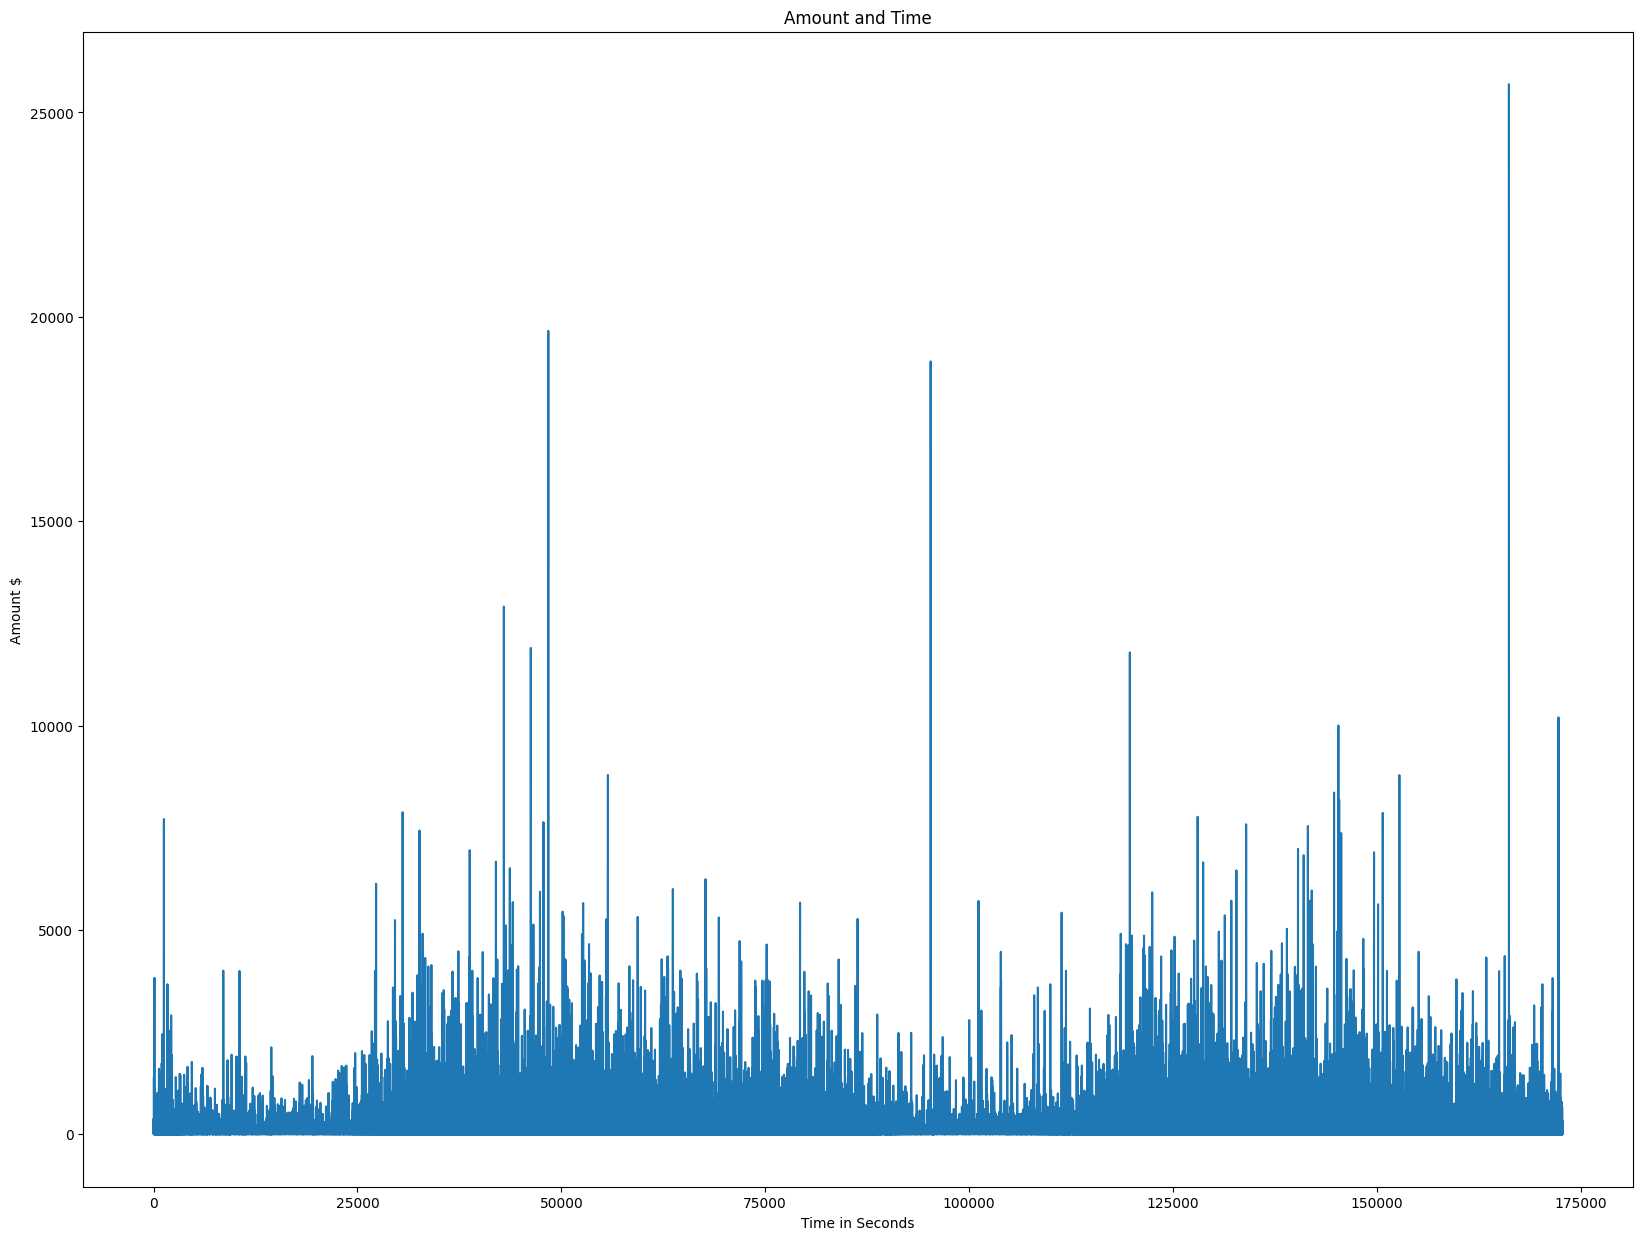

In [151]:
# Set variables for plot
x = df["Time"]
y = df["Amount"]
# Plotting x-axis and y-axis
plt.plot(x, y)
# naming of x-axis and y-axis
plt.xlabel("Time in Seconds")
plt.ylabel("Amount $")
# naming the title of the plot
plt.title("Amount and Time")

# setting x-axis values
plt.show()

In [152]:
class_counts = df["Class"].value_counts()
class_counts.index = class_counts.index.map({0: "Not Fraud", 1: "Fraud"})

In [153]:
imbalance = px.bar(x = class_counts.index,
       y = class_counts.values,
       labels = {"x": "Class", "y": "Count"},
       title = "Distribution of Classes in Credit Card Transactions",
       color = class_counts.index,
       color_discrete_sequence = ["#636EFA", "#EF553B"],
       text = class_counts.values
)
imbalance.update_yaxes(type="log")
imbalance.update_layout(
       xaxis_title="Class",
       yaxis_title="Count (log scale)",
)
imbalance.show('iframe')

In [154]:
amount_distribution_fraudvsnotfraud = px.histogram(df,
    x="Amount",
    color="Class",
    labels={"Class": "Transaction Class", "Amount": "Transaction Amount"},
    title="Distribution of Transaction Amounts by Class",
    color_discrete_map={0: "#636EFA", 1: "#EF553B"},
    nbins=50,
    histnorm="probability density",
    marginal="box")
amount_distribution_fraudvsnotfraud.show('iframe')

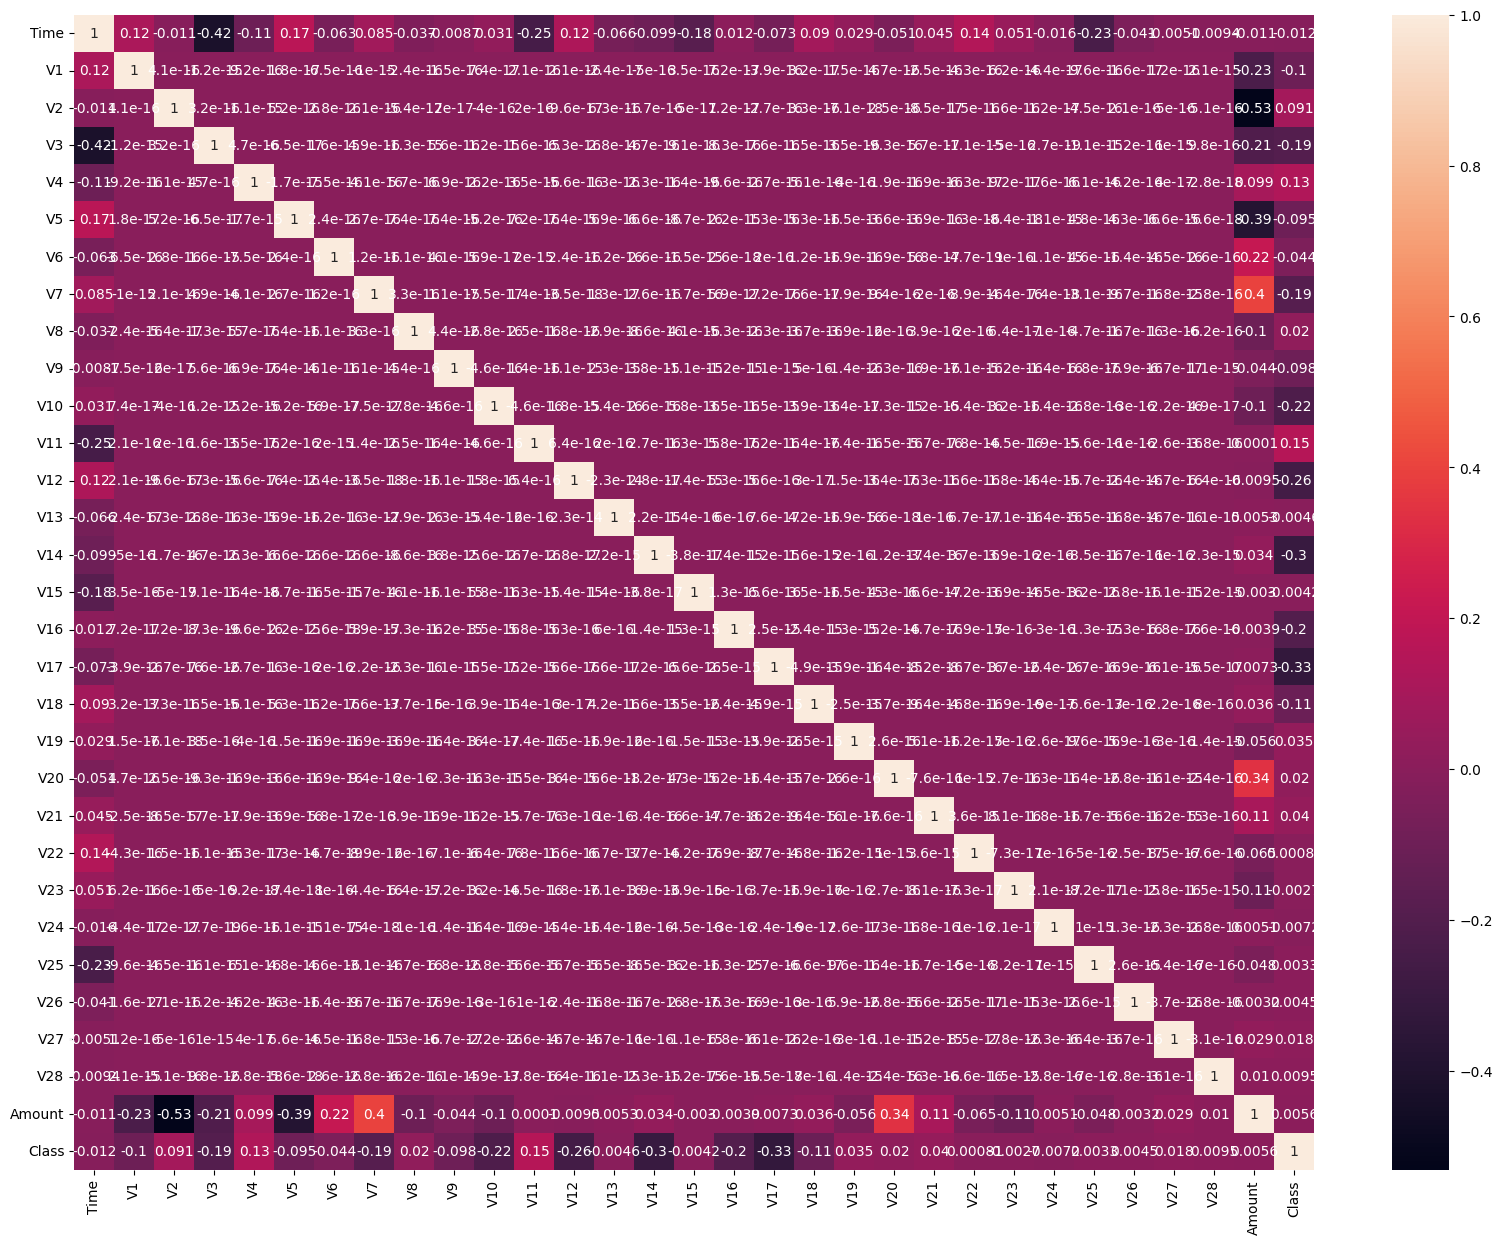

In [155]:
# What correlations can we see and what do we want to investigate
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,15)
plt.show() # lighter boxes show how correlated they are

In [156]:
df['Class'].dtype

dtype('int64')

In [157]:
# Lists the classes in order of the highest to least correlation.
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [158]:
# Test train split for our data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, random_state=42)

In [159]:
scaler = StandardScaler()

In [160]:
X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

In [161]:
# random forest model
model = RandomForestClassifier(
    n_estimators=100, # sets number of decision trees
    random_state=42, # random number for repeatability
    class_weight='balanced',  # Apply weights here
    n_jobs=-1) # uses all available CPU cores

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.73      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



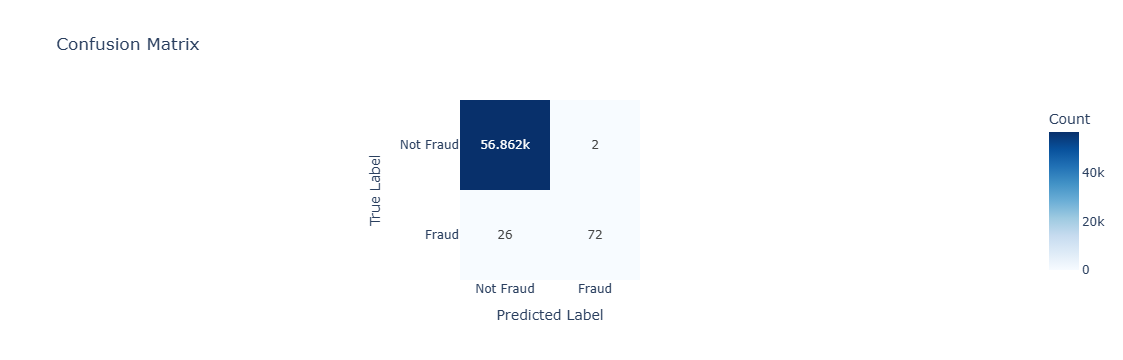

In [162]:
model.fit(X_train.drop(columns=['Amount', 'Time']), y_train)
y_pred = model.predict(X_test.drop(columns=['Amount', 'Time']))

print(classification_report(y_test, y_pred))
px.imshow(confusion_matrix(y_test, y_pred),
    labels=dict(x="Predicted Label", y="True Label", color="Count"),
    x=["Not Fraud", "Fraud"],
    y=["Not Fraud", "Fraud"],
    title="Confusion Matrix",
    text_auto=True,
    color_continuous_scale='Blues'
).show()

In [ ]:
scores = cross_val_score(model,X_train.drop(columns=['Amount', 'Time']), y_test, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.99951722 0.99938555 0.99947333 0.99953916 0.99949527]
Average cross-validation score: 0.9994821040619719


In [115]:
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, X_train.drop(columns=['Amount','Time']), y_train, scoring=scoring)
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
scores['test_recall_macro']

array([0.89097069, 0.82910293, 0.86705563, 0.87972485, 0.88602099])

In [116]:
model2 = RandomForestClassifier(random_state=42)

In [117]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='recall_macro', n_jobs=-1)
grid_search.fit(X_train.drop(columns=['Amount', 'Time']), y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test.drop(columns=['Amount', 'Time']))
print(classification_report(y_test, y_pred_best))
px.imshow(confusion_matrix(y_test, y_pred_best),
    labels=dict(x="Predicted Label", y="True Label", color="Count"),
    x=["Not Fraud", "Fraud"],
    y=["Not Fraud", "Fraud"],
    title="Confusion Matrix for Best Model",
    text_auto=True,
    color_continuous_scale='Blues'
).show()

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

